In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("brainstroke.csv")

In [63]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [64]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [66]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

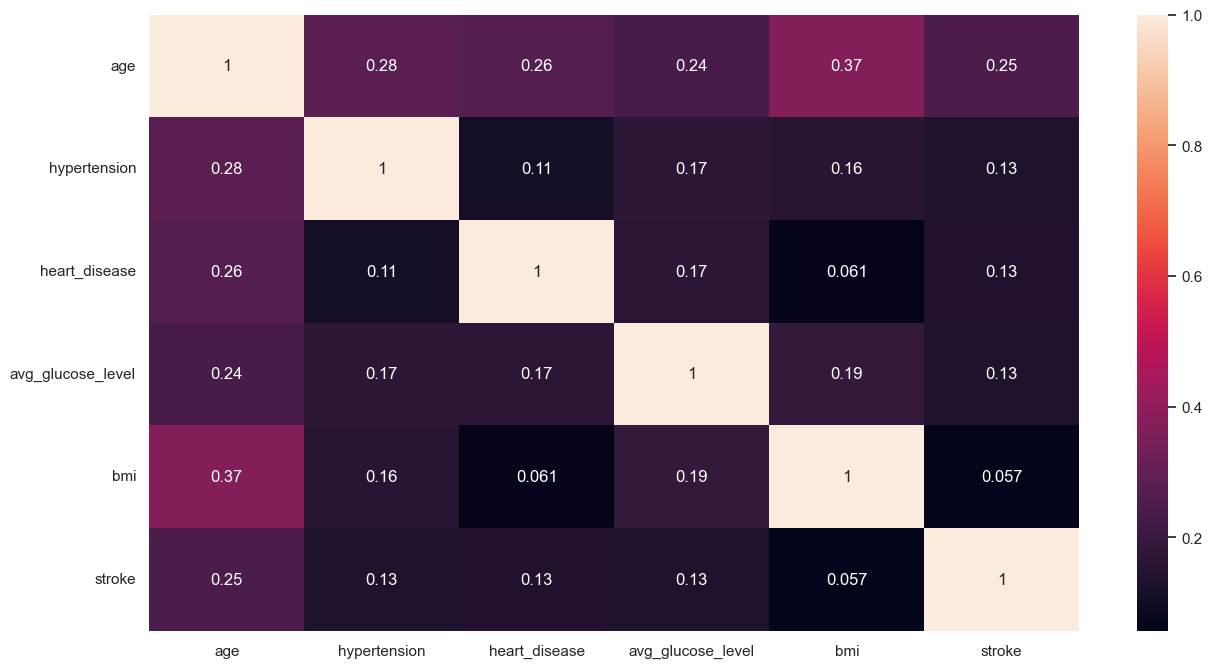

In [67]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [68]:
#dropar colunas que não serão utilizadas
df.drop(['ever_married','work_type','Residence_type'], axis = 1, inplace = True)
df = df.dropna()
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


In [69]:
from sklearn.preprocessing import OrdinalEncoder
#aplicar OrdinalEncoding nas colunas gender e smoking_status, visto que estão setadas como "objetos" e tendem a ter importância no resultado final.
#categorizamos os objetos destas colunas em ID's numéricos
ord_enc = OrdinalEncoder()
df["gender"] = ord_enc.fit_transform(df[["gender"]])
df["smoking_status"] = ord_enc.fit_transform(df[["smoking_status"]])

In [70]:
target = 'stroke'
x = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [71]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status']
x = pd.get_dummies(x[columns])

0    4733
1     248
Name: stroke, dtype: int64


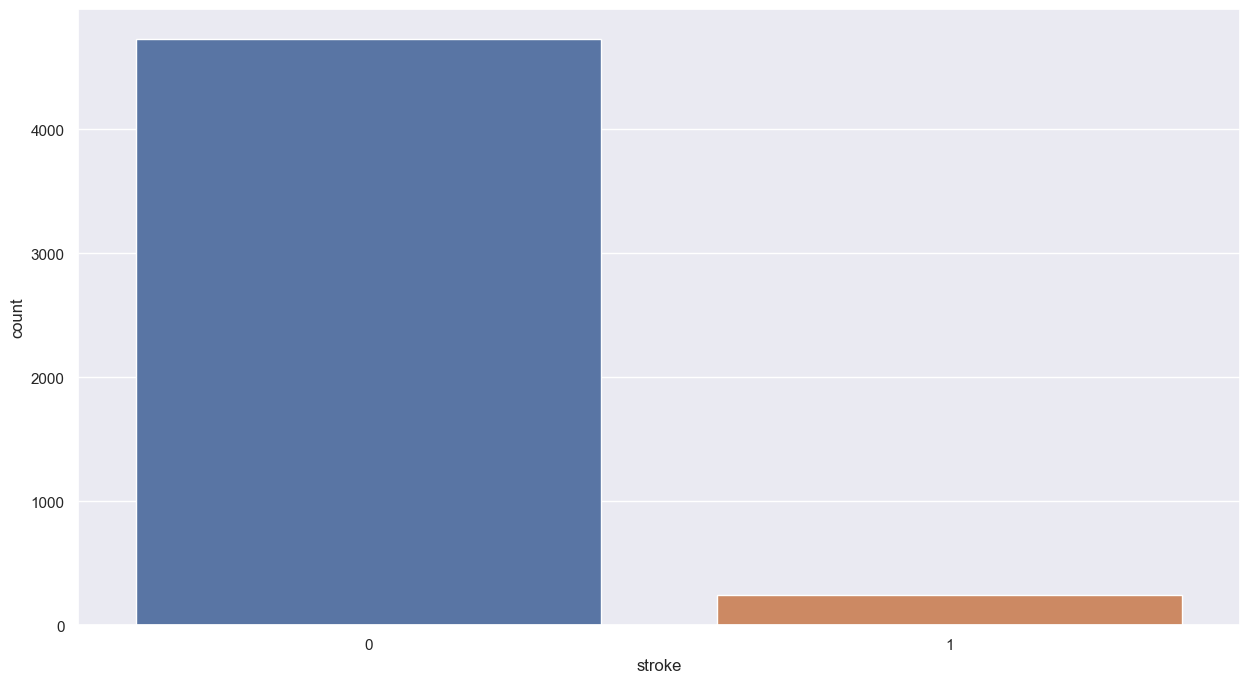

In [72]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

Temos um Oversampling no Dataset, precisamos equializar os dados.

In [73]:
percentage_no_stroke = 100*(4733/float(df.shape[0]))
percentage_no_stroke

95.0210801043967

In [74]:
percentage_yes_stroke = 100*(248/float(df.shape[0]))
percentage_yes_stroke

4.978919895603292

In [75]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

1    4733
0    4733
Name: stroke, dtype: int64


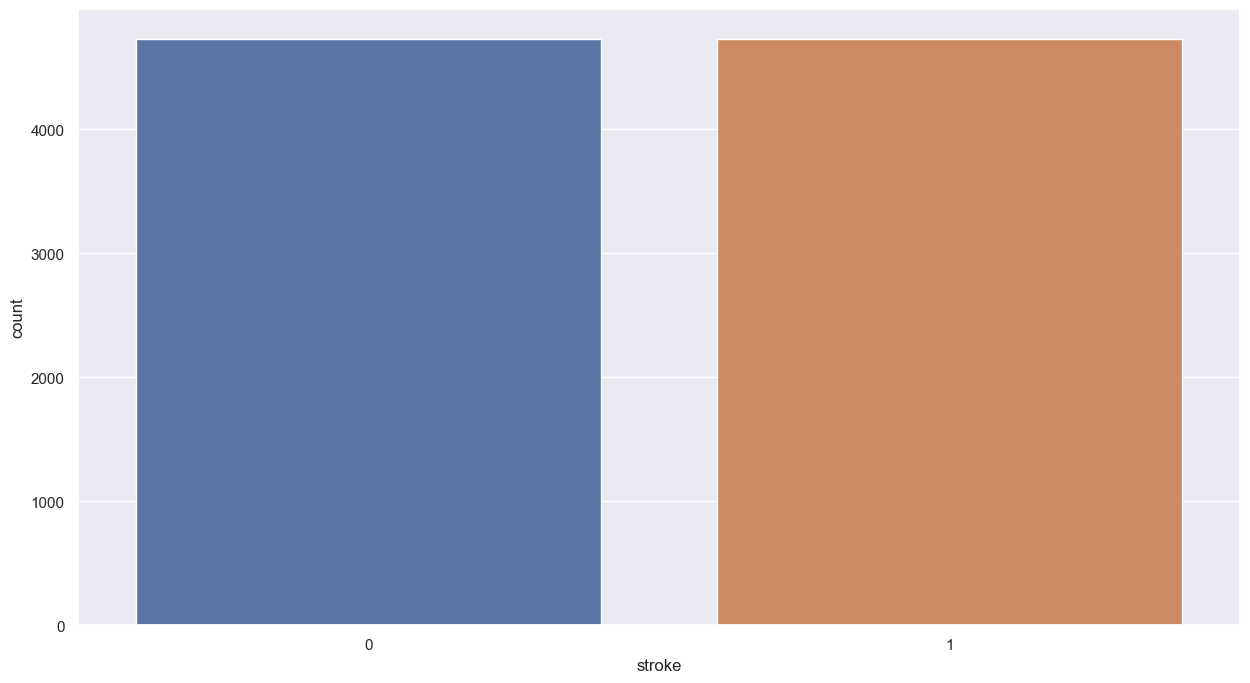

In [76]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [77]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,228.69,36.6,1.0,1
1,1.0,80.0,0,1,105.92,32.5,2.0,1
2,0.0,49.0,0,0,171.23,34.4,3.0,1
3,0.0,79.0,1,0,174.12,24.0,2.0,1
4,1.0,81.0,0,0,186.21,29.0,1.0,1


In [78]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   float64
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   float64
 7   stroke             4981 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 311.4 KB


In [79]:
# Definição dos imputs e do nosso objetivo
from sklearn.model_selection import GridSearchCV,train_test_split 

# dividimos os valores em variaveis de treino e teste com estado randômico de 25 e a porcentagem de 80% para treino e 20% para teste
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=20, test_size=0.20)
x_train.shape , x_test.shape,y_train.shape,y_test.shape #apresentação do "corpo" de cada variavel, meio que uma descrição do formato dos dados contidos nessa variavel

((7572, 7), (1894, 7), (7572, 1), (1894, 1))

Criando a Random Forest

In [80]:
# Iniciando a floresta e treinando o modelo
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=20, n_jobs=-1)
clf.fit(x_train, y_train)


C:\Users\Gabriel.Marques\AppData\Local\Temp\ipykernel_18864\2241089125.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=20)

In [81]:
# printando os resultados de treino e teste 
print (clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

1.0
0.9667370644139388


Modelo está overfitado, ou seja, o treino está "memorizando" os resultados  e com uma acurácia extremamente alta. Caracterizando o Overfiting

Vamos encontrar os melhores parâmetros para a nossa Random Forest utilizando o GridSearchCV

In [82]:
# alocando varios parâmetros para buscar qual o melhor
param_grid = {
    'n_estimators': np.linspace(2100, 2300, 5, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [83]:
# Retreino da floresta
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri encontrados anteriormente
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\Gabriel.Marques\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', n_jobs=-1),
             n_jobs=8,
             param_grid={'max_depth': [170, 180, 190, 200, 210, 220],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([2100, 2150, 2200, 2250, 2300])},
             verbose=2)

In [84]:
# Retornando os melhores parâmetros para serem utilizados.
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_ # pritnando os melhores parametros

{'max_depth': 170,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2100}

In [85]:
# printando novamente os resultados obtidos na floresta com os melhores parâmetros.
print(grid_rf_search.score(x_train, y_train))
print(grid_rf_search.score(x_test, y_test))

0.9935287902799789
0.9656810982048575


In [86]:
# Fazendo uma previsão
# [gender,age,hypertension,heart_disease,glucose_level,bmi,smokes]
# gender = 1 male, 0 female
# age
# hypertension = 0 yes, 1 no
# heart_disease = 0 no, 1 yes
# glucose_leve
# bmi
# smokes = 1 formal, 2 never, 3 smokes e 4 unknow
row = [[1, 67, 0, 1, 228.69, 36.6, 1]]
y_trainhat = best_rf_grid.predict(row)
print('Classificação: %d' % y_trainhat[0])
if(y_trainhat == 0):
    print('Classificação: Paciente provavelmente não terá um Derrame')
if(y_trainhat == 1):
    print('Classificação: Paciente poderá ter um Derrame')

c:\Users\Gabriel.Marques\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classificação: 1
Classificação: Paciente poderá ter um Derrame


RETREINO COM OS MELHORES PARAMETROS ENCONTRADOS PELO GRIDSEARCH

{'max_depth': 210,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 2300}

In [87]:
# Iniciando a floresta e treinando o modelo
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf_2=RandomForestClassifier(random_state=20, n_jobs=-1)
clf_2.fit(x_train, y_train)


C:\Users\Gabriel.Marques\AppData\Local\Temp\ipykernel_18864\3075425679.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_2.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=20)

In [88]:
# Retreino da floresta
clf_2=RandomForestClassifier(criterion='entropy', bootstrap= True, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri fixados
clf_2 = RandomForestClassifier(n_estimators=2300, max_depth=210, min_samples_split=3, min_samples_leaf=2, random_state=20, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri fixados
clf_2.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=210, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=2300, n_jobs=-1, random_state=20)

In [89]:
print(clf_2.score(x_train, y_train))
print(clf_2.score(x_test, y_test))

0.993000528262018
0.9646251319957762


[Text(0.2382186627223284, 0.9791666666666666, 'X[6] <= 0.0\ngini = 0.5\nsamples = 4803\nvalue = [3818, 3754]'),
 Text(0.06364839041599295, 0.9375, 'X[1] <= 55.199\ngini = 0.24\nsamples = 865\nvalue = [1145, 186]'),
 Text(0.029398794649419375, 0.8958333333333334, 'X[5] <= 18.65\ngini = 0.044\nsamples = 622\nvalue = [949, 22]'),
 Text(0.027046891077465825, 0.8541666666666666, 'gini = 0.0\nsamples = 149\nvalue = [230, 0]'),
 Text(0.03175069822137292, 0.8541666666666666, 'X[3] <= 0.5\ngini = 0.058\nsamples = 473\nvalue = [719, 22]'),
 Text(0.029398794649419375, 0.8125, 'X[0] <= 0.907\ngini = 0.058\nsamples = 470\nvalue = [712, 22]'),
 Text(0.02116713214758195, 0.7708333333333334, 'X[4] <= 81.019\ngini = 0.091\nsamples = 263\nvalue = [379, 19]'),
 Text(0.01646332500367485, 0.7291666666666666, 'X[0] <= 0.111\ngini = 0.202\nsamples = 103\nvalue = [132, 17]'),
 Text(0.0141114214317213, 0.6875, 'X[1] <= 14.5\ngini = 0.083\nsamples = 98\nvalue = [132, 6]'),
 Text(0.011759517859767749, 0.64583333

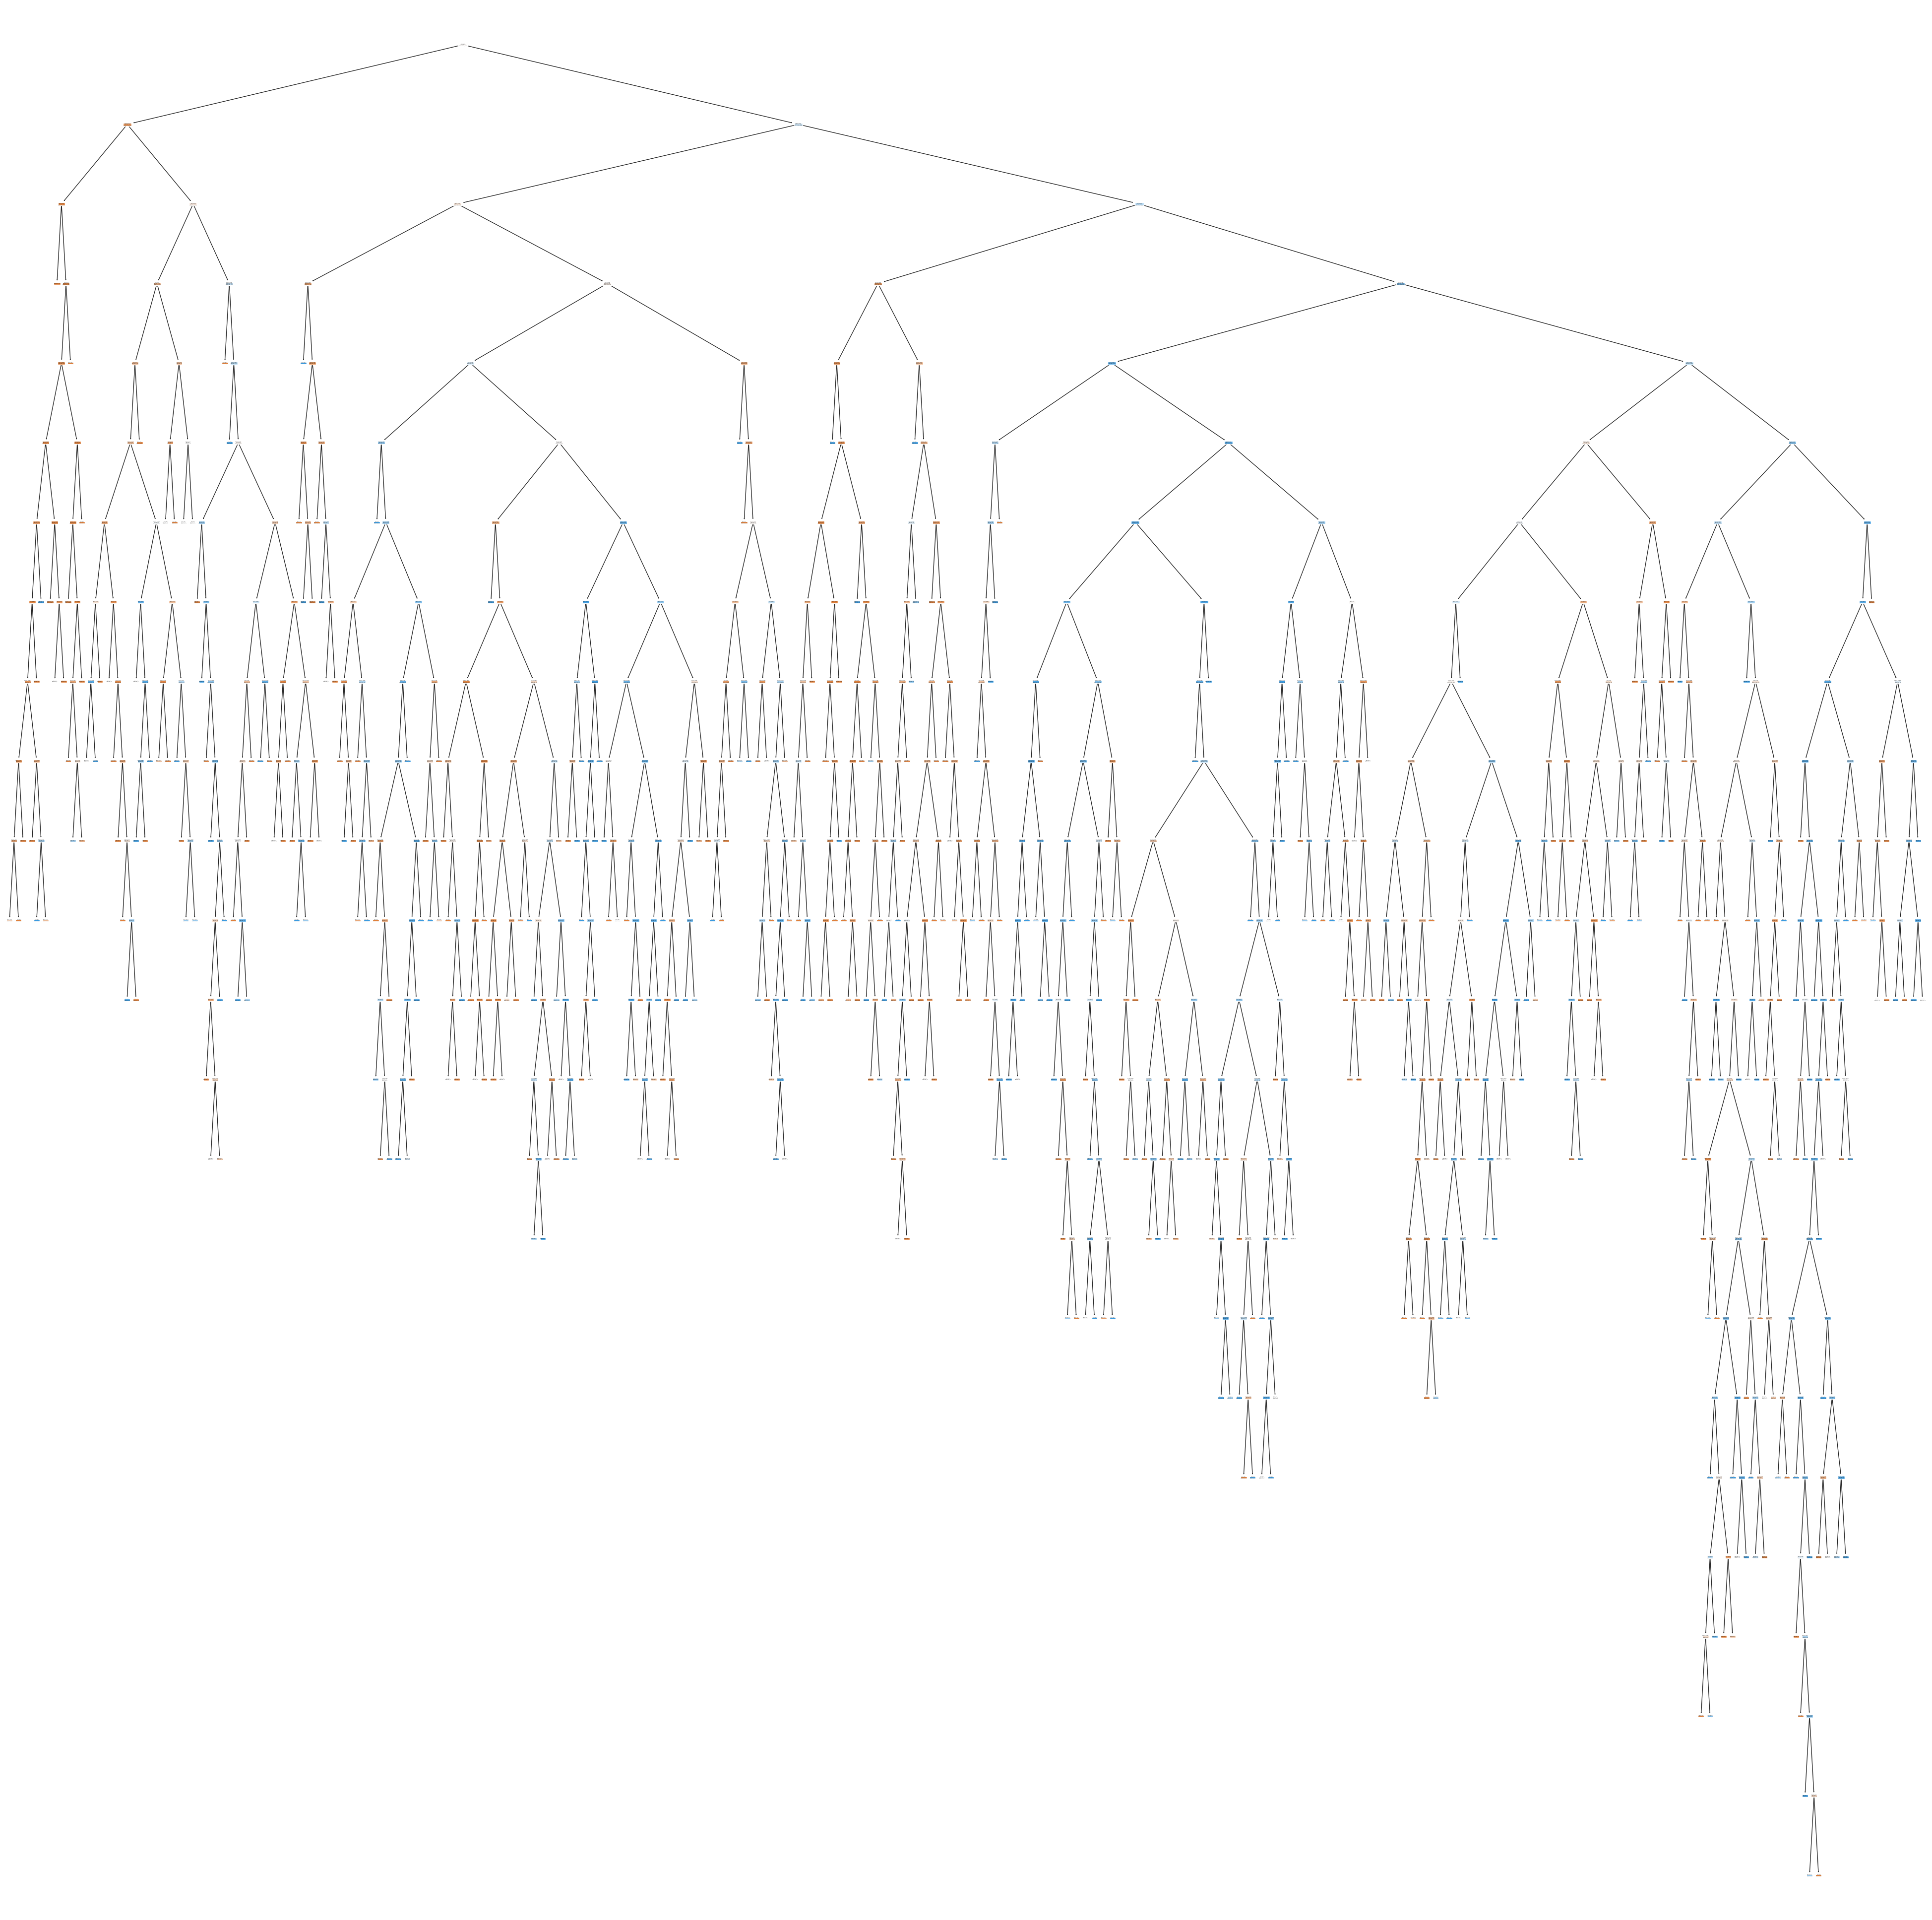

In [90]:
plt.figure(figsize=(50,50))
tree.plot_tree(clf_2.estimators_[1500],filled=True)

RETREINO COM PARAMETROS FIXADOS

In [91]:
# Iniciando a floresta e treinando o modelo
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf_3=RandomForestClassifier(random_state=20, n_jobs=-1)
clf_3.fit(x_train, y_train)


C:\Users\Gabriel.Marques\AppData\Local\Temp\ipykernel_18864\1814631711.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_3.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=20)

In [92]:
# Retreino da floresta
clf_3=RandomForestClassifier(criterion='entropy', bootstrap= True, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri fixados
clf_3 = RandomForestClassifier(n_estimators=5, max_depth=3, min_samples_split=4, min_samples_leaf=2, random_state=20, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri fixados
clf_3.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=5, n_jobs=-1, random_state=20)

In [93]:
print(clf_3.score(x_train, y_train))
print(clf_3.score(x_test, y_test))

0.822107765451664
0.8152059134107709


In [94]:
clf_3.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=378518883),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1663920602),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1708167439),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1951685855),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1681611676)]

In [95]:
len(clf_3.estimators_)

5

In [96]:
for i in range(len(clf_3.estimators_)):
    print(tree.export_text(clf_3.estimators_[i]))

|--- feature_6 <= 0.00
|   |--- feature_5 <= 27.05
|   |   |--- feature_5 <= 19.42
|   |   |   |--- class: 0.0
|   |   |--- feature_5 >  19.42
|   |   |   |--- class: 0.0
|   |--- feature_5 >  27.05
|   |   |--- feature_4 <= 157.11
|   |   |   |--- class: 0.0
|   |   |--- feature_4 >  157.11
|   |   |   |--- class: 1.0
|--- feature_6 >  0.00
|   |--- feature_0 <= 0.00
|   |   |--- feature_6 <= 2.00
|   |   |   |--- class: 1.0
|   |   |--- feature_6 >  2.00
|   |   |   |--- class: 0.0
|   |--- feature_0 >  0.00
|   |   |--- feature_1 <= 55.00
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  55.00
|   |   |   |--- class: 1.0

|--- feature_6 <= 0.00
|   |--- feature_4 <= 206.97
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_4 >  206.97
|   |   |--- feature_0 <= 0.99
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.99
|   |   |   |--- class: 1.0
|--- feature_6 >  0.00
|   |--- feature_0 <= 0

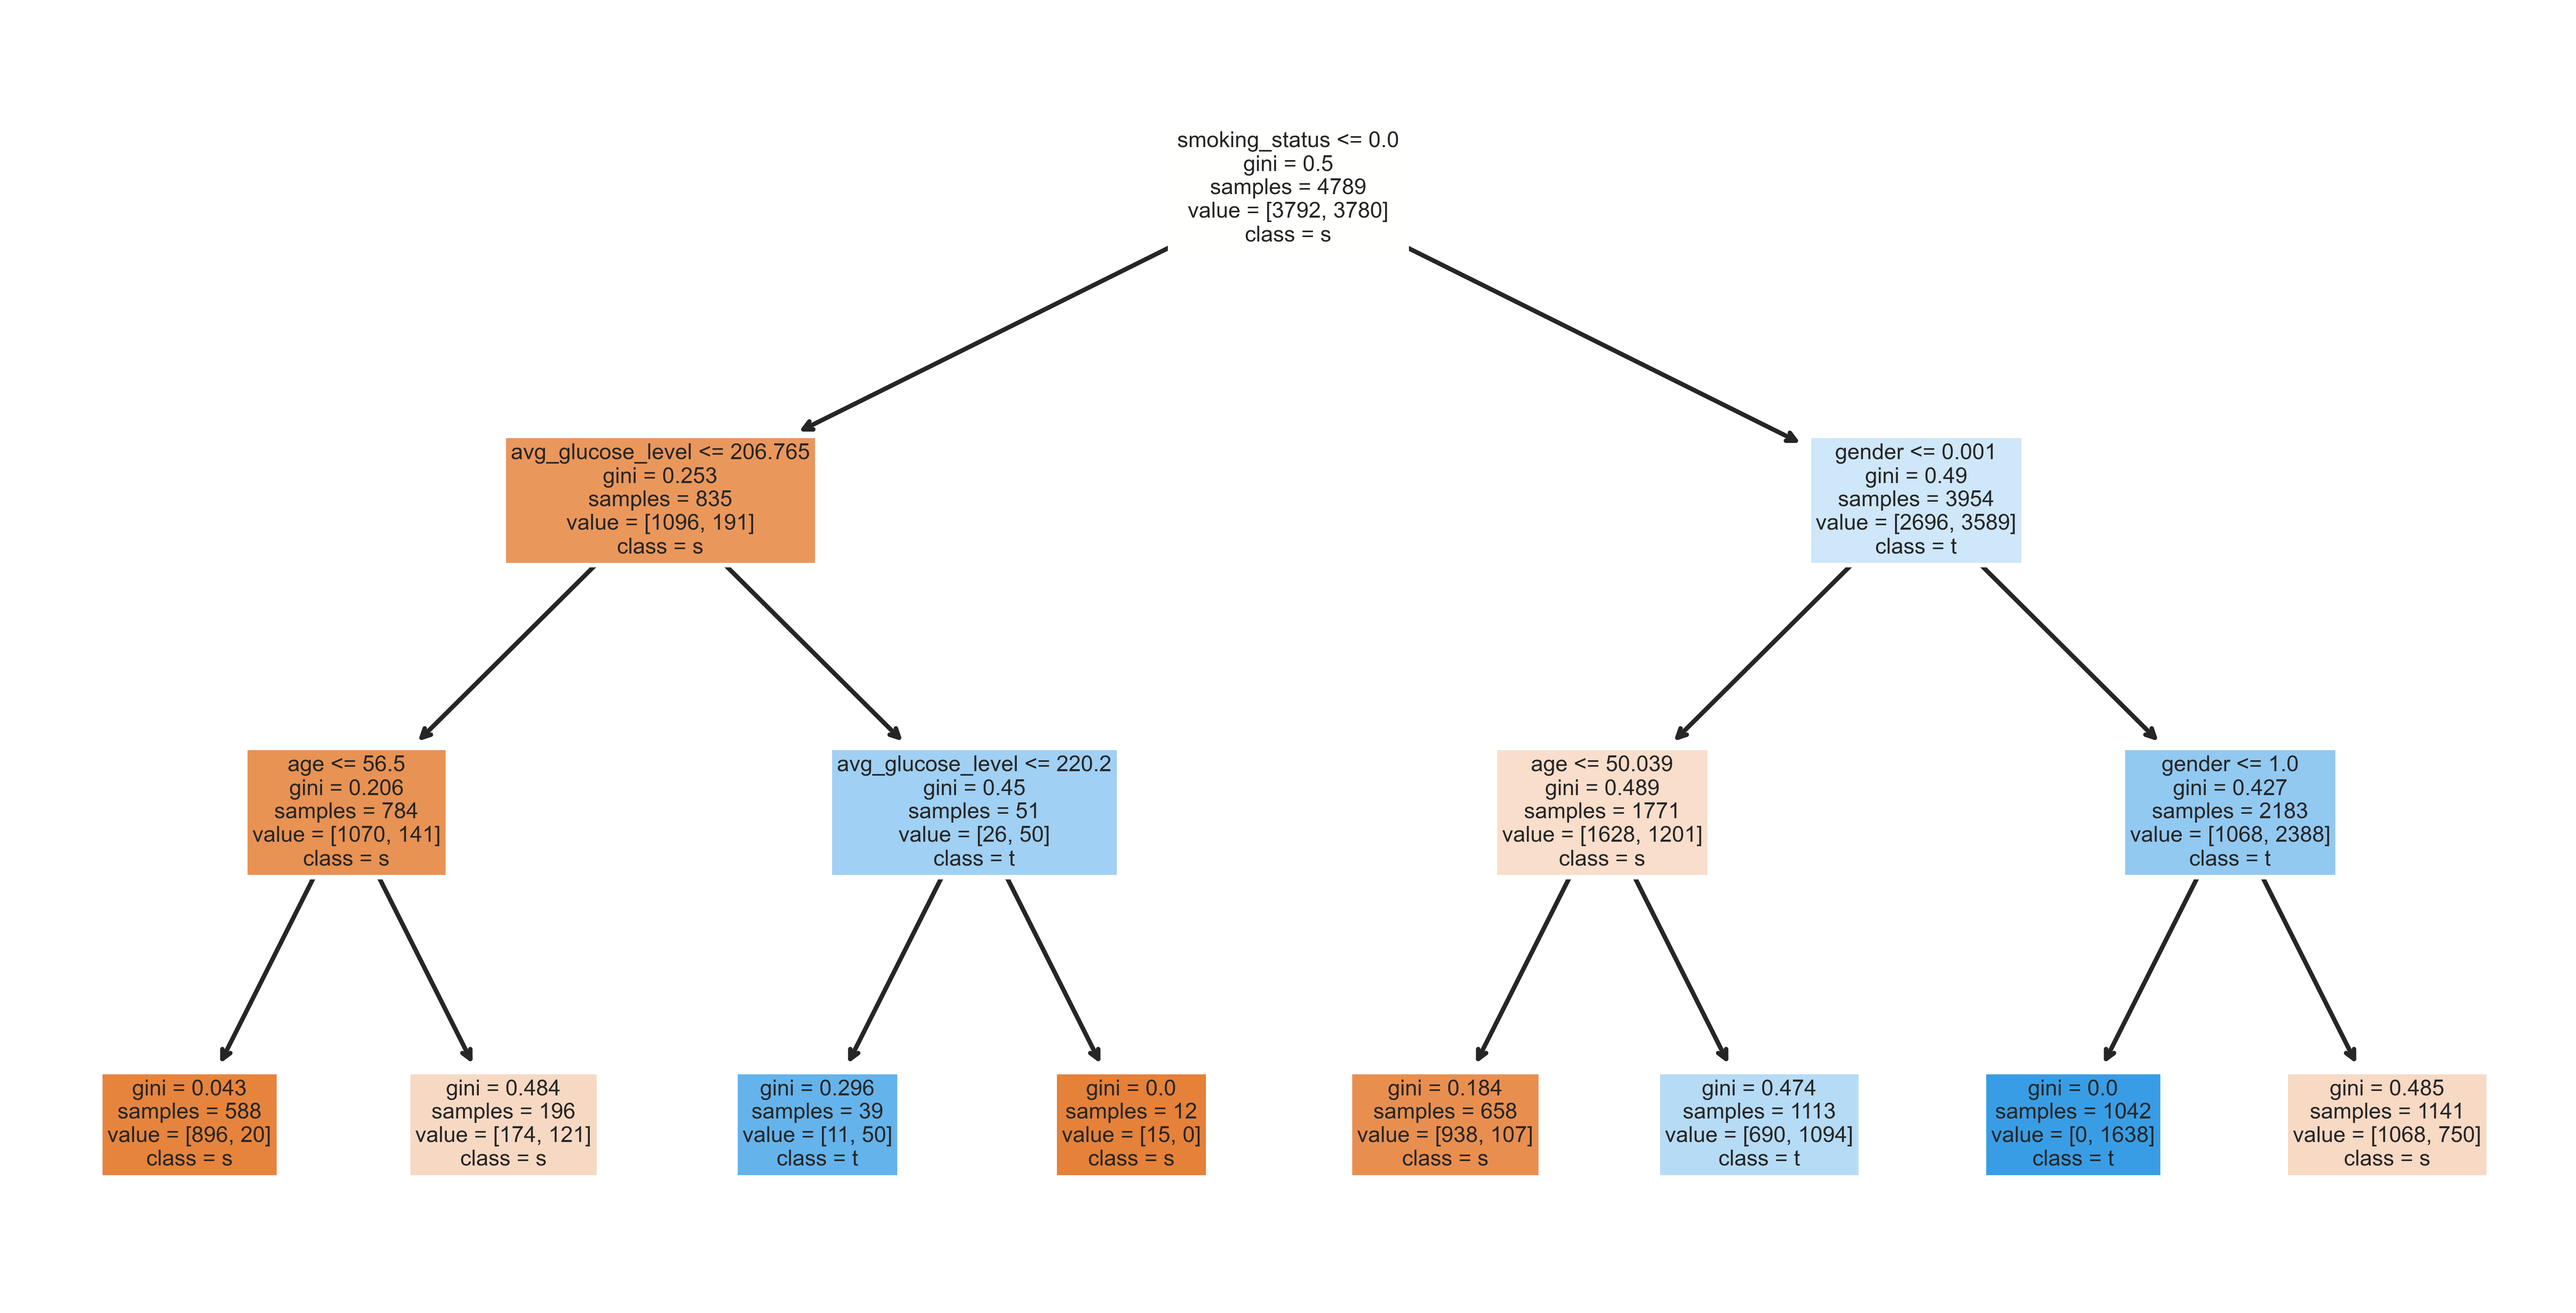

In [97]:
fn=columns
cn=target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5,), dpi=800)
tree.plot_tree(clf_3.estimators_[4],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')


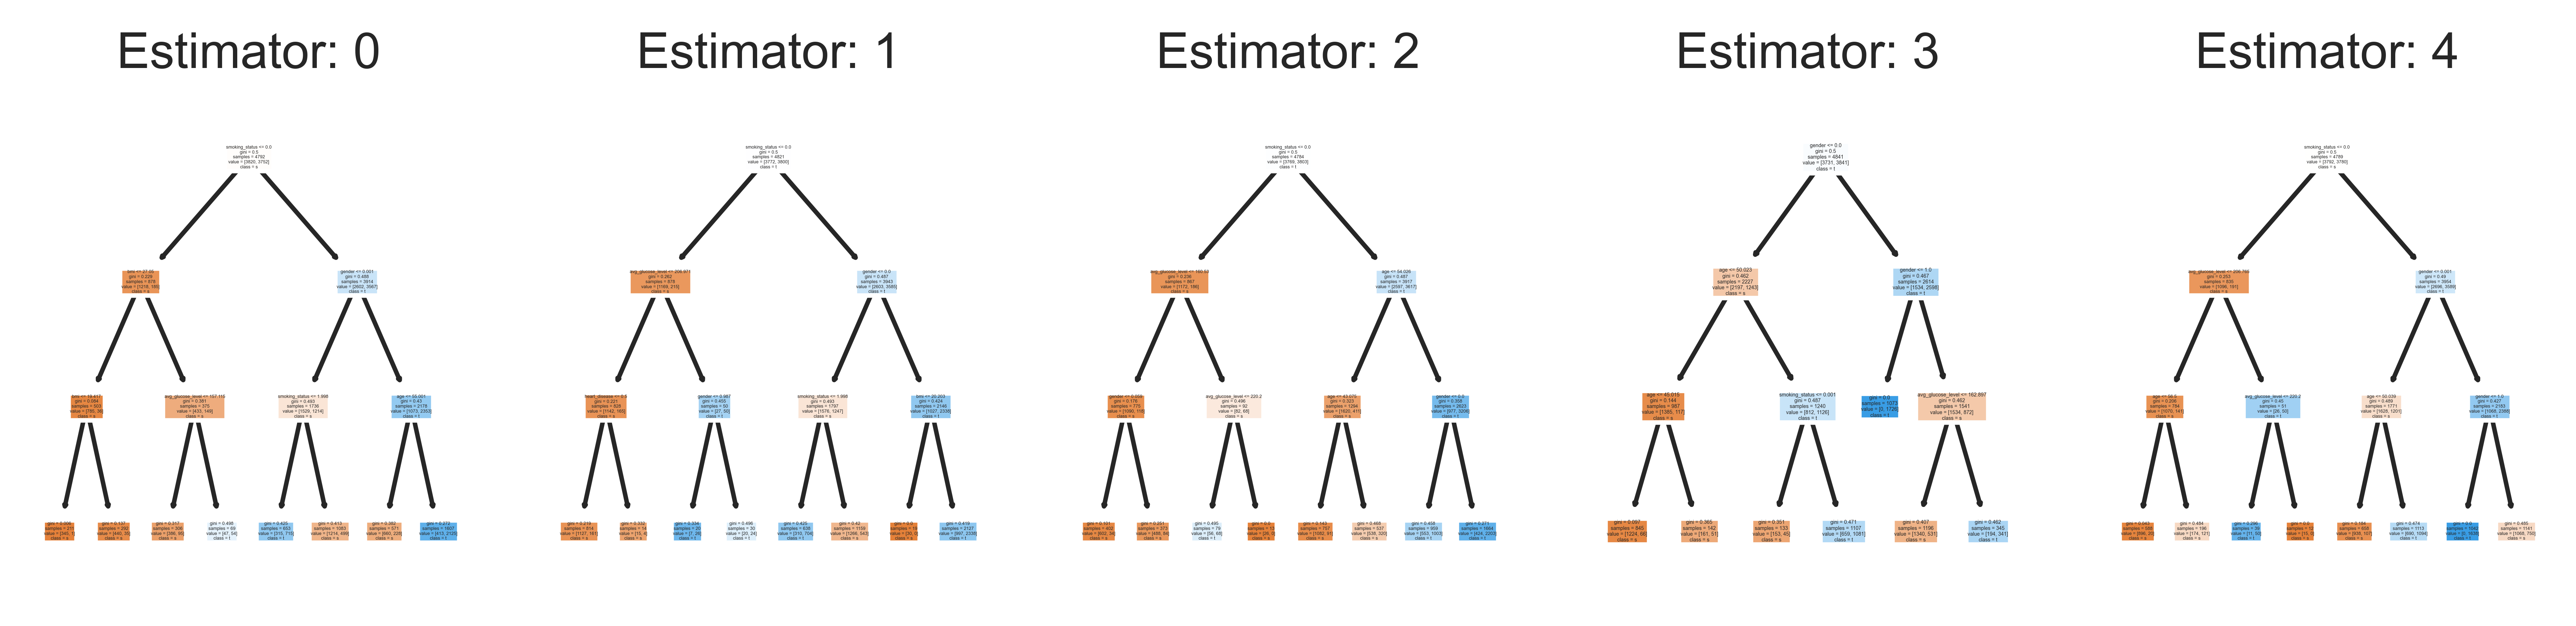

In [98]:
# This may not the best way to view each estimator as it is small
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf_3.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [99]:
# Fazendo uma previsão
# [gender,age,hypertension,heart_disease,glucose_level,bmi,smokes]
# gender = 1 male, 0 female
# age
# hypertension = 0 yes, 1 no
# heart_disease = 0 no, 1 yes
# glucose_leve
# bmi
# smokes = 1 formal, 2 never, 3 smokes e 4 unknow
row = [[1, 67, 0, 1, 228.69, 36.6, 1]]
y_trainhat = clf_3.predict(row)
print('Classificação: %d' % y_trainhat[0])
if(y_trainhat == 0):
    print('Classificação: Paciente provavelmente não terá um Derrame')
if(y_trainhat == 1):
    print('Classificação: Paciente poderá ter um Derrame')

Classificação: 1
Classificação: Paciente poderá ter um Derrame


c:\Users\Gabriel.Marques\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
